In [1]:
# !/usr/bin/python3
import pandas as pd
import os
import json
import csv
import sys
from pandas import json_normalize
import requests as r
import xmltodict
import time
from datetime import datetime
import string 
from tenacity import *
from matplotlib import pyplot as plt
import semanticscholar as sch
from unittest import TestCase
from tqdm import tqdm

# Pubmed API connect

## Definitive

In [2]:

# Global variables to control script flow
input_default_path = "data/twitter.json"


In [3]:
inputdir = input_default_path

head, tail = os.path.split(inputdir)
tail = '.'.join((tail.split('.')[0], 'csv'))
outputfile = f"{head}/{tail}"
print(outputfile)
if os.path.exists(outputfile):
    os.remove(outputfile)
    print(f"{outputfile} file removed")

data/twitter.csv


In [47]:
node = 'result'
json_file_path = inputdir
csv_file_path = outputfile

fp = open(json_file_path, 'r')
json_value = fp.read()
raw_data = json.loads(json_value)
fp.close()
data_to_be_processed = raw_data[node]['hits']['hit']
df = pd.json_normalize(data_to_be_processed, max_level=2)
for i in range(len(df)):
    if type(df['info.authors.author'][i]) != type(list()):
        df['info.authors.author'][i] = [df['info.authors.author'][i]]
df = df.rename(columns={"@score":"score","@id":"id","url":"url_num","info.authors.author":"author","info.title":"title",
                   "info.year":"year","info.type":"pub_type","info.key":"key","info.ee":"ee","info.url":"url",
                   "info.venue":"venue","info.volume":"vol","info.number":"num","info.pages":"pages",
                   "info.doi":"doi", "info.publisher":"publisher"
                   })
df = df[df['doi'].notna()]

In [49]:
df[['doi', 'pub_type','vol']]

,doi,pub_type,vol
0,10.1016/J.KNOSYS.2019.105353,Journal Articles,192
1,10.2197/IPSJJIP.27.404,Journal Articles,27
2,10.1145/3338855,Journal Articles,19
3,10.1145/3311957.3359513,Conference and Workshop Papers,NaN
4,10.1007/978-3-030-34223-4_14,Conference and Workshop Papers,NaN
5,10.1002/ASI.24011,Journal Articles,69
6,10.1007/S11280-017-0453-1,Journal Articles,21
7,10.1145/3210284.3219769,Conference and Workshop Papers,NaN
8,10.1007/978-3-319-98812-2_13,Conference and Workshop Papers,NaN
10,10.1108/AJIM-04-2017-0098,Journal Articles,69


In [22]:
df.author[0]

[{'@pid': '220/0089', 'text': 'Mohammad A. Hassonah'},
 {'@pid': '52/8946', 'text': 'Rizik M. H. Al-Sayyed'},
 {'@pid': '75/8371', 'text': 'Ali Rodan'},
 {'@pid': '210/0901', 'text': 'Ala&apos; M. Al-Zoubi'},
 {'@pid': '61/10168', 'text': 'Ibrahim Aljarah'},
 {'@pid': '58/10459', 'text': 'Hossam Faris'}]

In [51]:
a=sch.paper(df.doi[31])
a.keys()

dict_keys(['abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 'influentialCitationCount', 'is_open_access', 'is_publisher_licensed', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'])

In [54]:
a['citations'][0][0] 

{'arxivId': None,
 'authors': [{'authorId': '2734610',
   'name': 'Youngsub Han',
   'url': 'https://www.semanticscholar.org/author/2734610'},
  {'authorId': '3154431',
   'name': 'Hyeoncheol Lee',
   'url': 'https://www.semanticscholar.org/author/3154431'},
  {'authorId': '7652312',
   'name': 'Yanggon Kim',
   'url': 'https://www.semanticscholar.org/author/7652312'}],
 'doi': '10.1145/2811411.2811481',
 'intent': [],
 'isInfluential': False,
 'paperId': '16509223f9a78b1d8edb25d3ed7cba1ca4f32f97',
 'title': 'A real-time knowledge extracting system from social big data using distributed architecture',
 'url': 'https://www.semanticscholar.org/paper/16509223f9a78b1d8edb25d3ed7cba1ca4f32f97',
 'venue': 'RACS',
 'year': 2015}

In [29]:
df.iloc[0]

score                                                       2
id                                                      23867
url_num                                             URL#23867
author      [{'@pid': '220/0089', 'text': 'Mohammad A. Has...
title       An efficient hybrid filter and evolutionary wr...
venue                                      Knowl. Based Syst.
vol                                                       192
pages                                                  105353
year                                                     2020
pub_type                                     Journal Articles
key                              journals/kbs/HassonahARAAF20
doi                              10.1016/J.KNOSYS.2019.105353
ee               https://doi.org/10.1016/j.knosys.2019.105353
url         https://dblp.org/rec/journals/kbs/HassonahARAAF20
num                                                      Null
Name: 0, dtype: object

In [57]:
df.iloc[0]

score                                                       2
id                                                      23867
url_num                                             URL#23867
author      [{'@pid': '220/0089', 'text': 'Mohammad A. Has...
title       An efficient hybrid filter and evolutionary wr...
venue                                      Knowl. Based Syst.
vol                                                       192
pages                                                  105353
year                                                     2020
pub_type                                     Journal Articles
key                              journals/kbs/HassonahARAAF20
doi                              10.1016/J.KNOSYS.2019.105353
ee               https://doi.org/10.1016/j.knosys.2019.105353
url         https://dblp.org/rec/journals/kbs/HassonahARAAF20
num                                                       NaN
Name: 0, dtype: object

In [103]:
i = 0
new = [] #new pub info to be added each round for authors
publi = [] #new publication to add to dataframe
references = [] #pub_doi to reference doi rel
citations = [] #pub_doi to citation doi rel
authors = [] #pub_doi to author doi name
topics = [] #pub_doi to topic name
to_drop = [] #index if pub's doi is not found in ss
for i in tqdm(range(len(df))):
    row = df.iloc[i]
    data = sch.paper(row.doi)
    if data:
        new = []
        for topic in data['topics']:
            topics.append([row.doi, topic['topicId'],topic['topic']])
        for author in row.author:
            authors.append([row.doi, author['text']])
        for ref in data['references']:
            if ref['doi']:
                references.append([row.doi, ref['doi']])
                new.append([ref['doi'], ref['authors'], ref['title'], ref['venue'], ref['year'], ref['url']])
        for ref in data['citations']:
            if ref['doi']:
                citations.append([row.doi, ref['doi']])
                new.append([ref['doi'], ref['authors'], ref['title'], ref['venue'], ref['year'], ref['url']])
                
                
        for j in tqdm(range(len(new))):
            pub = new[j]
            publi.append(pub)
            data = sch.paper(pub[0])
            if data:
                for topic in data['topics']:
                    topics.append([pub[0], topic['topicId'],topic['topic']])
                for ref in data['references']:
                    if ref['doi']:
                        references.append([pub[0], ref['doi']])
                        new.append([pub[0], ref['authors'], ref['title'], ref['venue'], ref['year'], ref['url']])
                for ref in data['citations']:
                    if ref['doi']:
                        citations.append([pub[0], ref['doi']])
                        new.append([ref['doi'], ref['authors'], ref['title'], ref['venue'], ref['year'], ref['url']])
            for author in pub[1]:
                authors.append([pub[0], author['name']])
    else:
        to_drop.append(i)


 10%|█         | 4/39 [01:19<10:08, 17.38s/it]
0it [00:00, ?it/s]
100%|██████████| 39/39 [05:07<00:00,  7.89s/it]


In [102]:
references

[['10.1145/3338855', '10.1109/ACCESS.2018.2886314'],
 ['10.1145/3338855', '10.1109/PASSAT/SocialCom.2011.34'],
 ['10.1145/3338855', '10.1109/ASONAM.2014.6921610'],
 ['10.1145/3338855', '10.3905/jpm.2001.319822'],
 ['10.1145/3338855', '10.1108/IntR-05-2012-0095'],
 ['10.1145/3338855', '10.1145/324133.324140'],
 ['10.1145/3338855', '10.2308/accr-51865'],
 ['10.1145/3338855', '10.1126/science.346.6213.1063'],
 ['10.1145/3338855', '10.1108/IntR-06-2013-0115'],
 ['10.1145/3338855', '10.2200/S00416ED1V01Y201204HLT016'],
 ['10.1145/3338855', '10.1016/j.eswa.2015.07.052'],
 ['10.1145/3338855', '10.1109/INFCOMW.2011.5928903'],
 ['10.1145/3338855', '10.1016/j.eswa.2016.12.036'],
 ['10.1145/3338855', '10.1109/CIP.2010.5604088'],
 ['10.1145/3338855', '10.1016/j.jocs.2010.12.007'],
 ['10.1145/3338855', '10.1145/2124295.2124358'],
 ['10.1145/3338855', '10.1145/544741.544853'],
 ['10.1145/3338855', '10.1109/ISI.2010.5484757'],
 ['10.1145/3338855', '10.1007/978-3-030-02686-8_29'],
 ['10.1145/3338855',

In [104]:
publi = pd.DataFrame(publi,columns = ['doi', 'author', 'title','venue','year','url'])
topics = pd.DataFrame(topics,columns = ['doi','topicId','topic'])
authors = pd.DataFrame(authors,columns = ['doi','author_name'])
references = pd.DataFrame(references,columns = ['doi','doi_ref'])
citations = pd.DataFrame(citations,columns = ['doi','doi_cite'])

In [106]:
publi.drop_duplicates(subset = 'doi', inplace=True, ignore_index=True)
topics.drop_duplicates(subset = 'doi', inplace=True, ignore_index=True)
authors.drop_duplicates(subset = ['doi','author_name'], inplace=True, ignore_index=True)
references.drop_duplicates(subset = 'doi', inplace=True, ignore_index=True)
citations.drop_duplicates(subset = 'doi', inplace=True, ignore_index=True)

In [114]:
result = pd.concat([df, publi], axis=0)
result.drop_duplicates(subset = 'doi', inplace=True, ignore_index=True)

In [140]:
result.to_csv('data/result.csv')
topics.to_csv('data/topics.csv')
authors.to_csv('data/authors.csv')
references.to_csv('data/references.csv')
citations.to_csv('data/citations.csv')

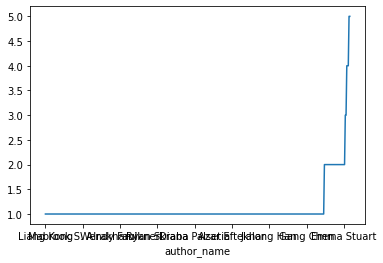

In [148]:
authors.groupby('author_name').size().sort_values().plot()